- generate parity check matrices
- simulate noise
- decode with MWPM decoder
- plot toric code with errors

In [5]:
import random as rd
import matplotlib.pyplot as plt

from utilities import l, read_matrix_from_file, add_mod_two
from MWPM_decoder import decode
from plot import plot_grid, plot_error, plot_points, plot_syndrome

In [6]:
p = 0.12

def simulate_noise(l, p_error):
    error = []
    for q in range(2 * l * l):
        if rd.random() < p_error:
            error.append(q)
    return error

def compute_syndrome(error, H):
    syndrome = []
    for check in H:
        w = 0
        for q in check:
            if q in error:
                w += 1
        syndrome.append(w % 2)
    return [i for i in range(l*l) if syndrome[i]]

def check_for_horizontal_logical_error(total_error, l):
    w = 0
    for i in range(l):
        if l*l + l*i in total_error:
            w += 1
    return (w % 2)

def check_for_vertical_logical_error(total_error, l):
    w = 0
    for i in range(l):
        if i in total_error:
            w += 1
    return (w % 2)

error: [14, 23, 24, 28, 34, 35, 36, 43, 54, 56, 58, 62, 69, 71, 79, 83, 88, 90, 94]
total_error: [14, 23, 24, 28, 34, 56, 58, 62, 69, 71, 79, 83, 90, 70, 10, 17, 13, 57]


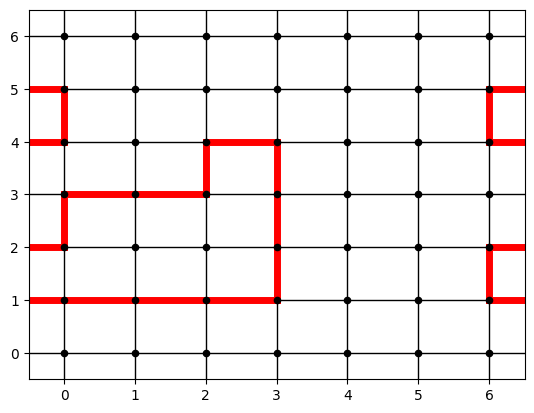

In [17]:
error = simulate_noise(l, p)
print('error:', error)

Hx = read_matrix_from_file('data/Hx_{}.txt'.format(l))
# print('Hx:', Hx)

syndrome = compute_syndrome(error, Hx)
# print('syndrome:', syndrome)

recovery = decode(syndrome)
# print('recovery:', recovery)

total_error = add_mod_two(error, recovery)
print('total_error:', total_error)

if check_for_horizontal_logical_error(total_error, l):
    print('Horizontal logical error')
if check_for_vertical_logical_error(total_error, l):
    print('Vertical logical error')

plot_grid(l)
# plot_error(error, 'blue', linewidth=4)
# plot_error(recovery, 'green', linewidth=3)
plot_error(total_error, 'red', linewidth=5)
plot_points(l, size=20)
# plot_syndrome(syndrome, size=100)

plt.xlim(-0.5, l - 0.5)
plt.ylim(-0.5, l - 0.5)
plt.xticks([i for i in range(l)])
plt.yticks([i for i in range(l)])
plt.show()